In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [2]:
ratings_df = pd.read_csv('data/combined_data_1.txt', names = ['user_id', 'rating', 'date'])
ratings_df.head()

,user_id,rating,date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


Dataset Shape:  (24058263, 3)
Number of Movies: 4499
'5' Ratings: 5506583 percentage of total ratings 0.22892812118718717
'4' Ratings: 8085741 percentage of total ratings 0.33615283662049733
'3' Ratings: 6904181 percentage of total ratings 0.2870312105830921
'2' Ratings: 2439073 percentage of total ratings 0.10140088678013137
'1' Ratings: 1118186 percentage of total ratings 0.046486944829092026


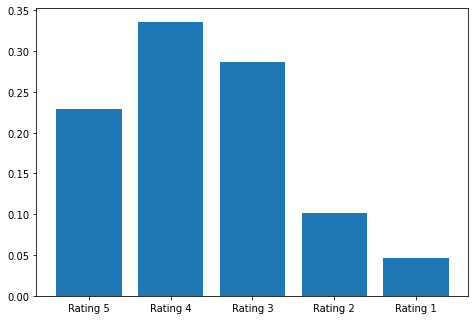

In [3]:
# exploratory analysis

print("Dataset Shape: ", ratings_df.shape)

rating_counts = ratings_df['rating'].value_counts(dropna = False)
print("Number of Movies:", rating_counts[np.nan])
print("'5' Ratings:", rating_counts[5], "percentage of total ratings",
      rating_counts[5]/(ratings_df.shape[0]-rating_counts[np.nan]))

print("'4' Ratings:", rating_counts[4], "percentage of total ratings",
      rating_counts[4]/(ratings_df.shape[0]-rating_counts[np.nan]))

print("'3' Ratings:", rating_counts[3], "percentage of total ratings",
      rating_counts[3]/(ratings_df.shape[0]-rating_counts[np.nan]))

print("'2' Ratings:", rating_counts[2], "percentage of total ratings",
      rating_counts[2]/(ratings_df.shape[0]-rating_counts[np.nan]))

print("'1' Ratings:", rating_counts[1], "percentage of total ratings",
      rating_counts[1]/(ratings_df.shape[0]-rating_counts[np.nan]))

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
rating = ['Rating 5', 'Rating 4','Rating 3','Rating 2','Rating 1']
nums=[rating_counts[5]/(ratings_df.shape[0]-rating_counts[np.nan]),
     rating_counts[4]/(ratings_df.shape[0]-rating_counts[np.nan]),
     rating_counts[3]/(ratings_df.shape[0]-rating_counts[np.nan]),
     rating_counts[2]/(ratings_df.shape[0]-rating_counts[np.nan]),
     rating_counts[1]/(ratings_df.shape[0]-rating_counts[np.nan])]
ax.bar(rating,nums)
plt.show()

In [4]:
movies_id = []
user_id = ratings_df['user_id'].tolist()
ratings_list = ratings_df['rating'].tolist()
# when rating_list is null user_id will have the movie_id in the same column
for i in range(len(ratings_list)):
    if (pd.isnull(ratings_list[i])):
        movie_id = user_id[i][:-1]
        movies_id.append(-1)
    else:
        movies_id.append(int(movie_id))

# add movie_id to dataframe
ratings_df['movie_id'] = movies_id
ratings_df

,user_id,rating,date,movie_id
0,1:,NaN,NaN,-1
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
...,...,...,...,...
24058258,2591364,2.0,2005-02-16,4499
24058259,1791000,2.0,2005-02-10,4499
24058260,512536,5.0,2005-07-27,4499
24058261,988963,3.0,2005-12-20,4499


In [5]:
# drop all rows with NaN values, original movie ids are no longer needed
ratings_df = ratings_df.dropna()
ratings_df

,user_id,rating,date,movie_id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1
...,...,...,...,...
24058258,2591364,2.0,2005-02-16,4499
24058259,1791000,2.0,2005-02-10,4499
24058260,512536,5.0,2005-07-27,4499
24058261,988963,3.0,2005-12-20,4499


In [6]:
# read the movie names into a separate dataframe (found encoding attribute on stack overflow after a certain error)
movies_df = pd.read_csv('data/movie_titles.csv', encoding = "ISO-8859-1", names = ['movie_id', 'year', 'movie_name'])
movies_df

,movie_id,year,movie_name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [9]:
# add movie_name to ratings df
movie_names = []
movie_ids = ratings_df['movie_id'].tolist()
for movie_id in movie_ids:
    movie_names.append(movies_df.at[movie_id - 1, 'movie_name'])
    

ratings_df['movie_name'] = movie_names
ratings_df

/tmp/ipykernel_4444/3571381901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['movie_name'] = movie_names


,user_id,rating,date,movie_id,movie_name
1,1488844,3.0,2005-09-06,1,Dinosaur Planet
2,822109,5.0,2005-05-13,1,Dinosaur Planet
3,885013,4.0,2005-10-19,1,Dinosaur Planet
4,30878,4.0,2005-12-26,1,Dinosaur Planet
5,823519,3.0,2004-05-03,1,Dinosaur Planet
...,...,...,...,...,...
24058258,2591364,2.0,2005-02-16,4499,In My Skin
24058259,1791000,2.0,2005-02-10,4499,In My Skin
24058260,512536,5.0,2005-07-27,4499,In My Skin
24058261,988963,3.0,2005-12-20,4499,In My Skin


In [8]:
# test to get all the ratings for a particular user 
test_df = ratings_df[(ratings_df['user_id'] == '1488844') & (ratings_df['rating'] == 5)]
test_df

,user_id,rating,date,movie_id,movie_name
262322,1488844,5.0,2005-04-20,58,Dragonheart
458444,1488844,5.0,2005-04-14,143,The Game
717301,1488844,5.0,2005-04-19,191,X2: X-Men United
2499557,1488844,5.0,2005-04-12,468,The Matrix: Revolutions
3014614,1488844,5.0,2005-04-11,571,American Beauty
3216767,1488844,5.0,2005-04-11,607,Speed
3417605,1488844,5.0,2005-04-12,658,Robin Hood: Prince of Thieves
4147071,1488844,5.0,2005-04-11,798,Jaws
4371054,1488844,5.0,2005-06-29,851,Back to the Future Part III
5982080,1488844,5.0,2005-04-13,1180,A Beautiful Mind
